# Introduction
Data phishing has emerged as a prevalent and successful method employed by cybercriminals to deceive individuals and illicitly obtain their personal and financial information. In our increasingly internet-dependent world, where we conduct a significant portion of our daily activities online, fraudsters have found a fertile ground to execute targeted phishing attacks. These modern-day phishing attempts have become remarkably sophisticated, making them harder to detect. Astonishingly, a recent study conducted by Intel revealed that an overwhelming 97% of security experts failed to differentiate between genuine emails and phishing emails. This alarming statistic underscores the urgent need for a deeper understanding of data phishing and the implementation of robust countermeasures to safeguard ourselves from these insidious attacks.

# About the dataset
The dataset provided consists of a total of 10,000 urls and it encompasses 18 distinct features that have been extracted. Its primary purpose is to serve as a benchmark for machine learning-driven systems that specialize in detecting phishing attempts. It is noteworthy that this dataset has been meticulously balanced, as it contains an equal distribution of 50% phishing URLs and 50% legitimate URLs. This ensures that the dataset accurately represents both types of URLs for comprehensive analysis and evaluation.

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
# Loading the dataset
data = pd.read_csv("Phishing_Data.csv")

# Displaying the first five rows of the dataset
print(data.head())

                  Domain  Have_IP  Have_At  URL_Length  URL_Depth  \
0     creativemarket.com        0        0           1          3   
1             fareast.qa        0        0           1          3   
2       rocketnews24.com        0        0           1          2   
3  girlsgettinggoals.com        0        0           0          2   
4                 olx.ua        0        0           1          3   

   Redirection  https_Domain  TinyURL  Prefix/Suffix  DNS_Record  Web_Traffic  \
0            0             0        1              0         0.0          1.0   
1            0             0        0              0         1.0          1.0   
2            0             0        0              0         0.0          1.0   
3            0             0        0              0         0.0          1.0   
4            0             0        0              0         0.0          1.0   

   Domain_Age  Domain_End  iFrame  Mouse_Over  Right_Click  Web_Forwards  \
0         0.0         

In [3]:
# Randomly shuffle the rows of the dataset
data = data.sample(frac=1)

# Reset the index of the shuffled dataset and drop the old index
data = data.reset_index(drop=True)


In [4]:
# Display the first five rows of the dataset to verify the shuffle and reset
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,steampowered.codes,0,0,0,0,0,0,0,0,0.0,1.0,0.0,1.0,1,1,1,1,1
1,searchstorage.techtarget.com,0,0,1,2,1,0,0,0,NaN,NaN,NaN,NaN,1,1,1,1,0
2,google.com,0,0,1,1,1,0,0,0,0.0,1.0,1.0,1.0,0,0,1,0,1
3,logln-office365-0nline.wm.r.appspot.com,0,0,0,1,1,0,0,1,NaN,NaN,NaN,NaN,0,0,0,0,1
4,everything.explained.today,0,0,0,2,1,0,0,0,NaN,NaN,NaN,NaN,1,1,1,1,0


# Understanding the data

In [5]:
# Finding the shape of the dataset, which returns the number of rows and columns in the DataFrame
data.shape


(22744, 18)

In [6]:
# Features of the data
data.columns  # Displaying the column names (features) of the dataset


Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [7]:
# Overview of the data
# Displays summary information about the dataset including the number of non-null entries, data types, and memory usage
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22744 entries, 0 to 22743
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Domain         22744 non-null  object 
 1   Have_IP        22744 non-null  int64  
 2   Have_At        22744 non-null  int64  
 3   URL_Length     22744 non-null  int64  
 4   URL_Depth      22744 non-null  int64  
 5   Redirection    22744 non-null  int64  
 6   https_Domain   22744 non-null  int64  
 7   TinyURL        22744 non-null  int64  
 8   Prefix/Suffix  22744 non-null  int64  
 9   DNS_Record     10000 non-null  float64
 10  Web_Traffic    10000 non-null  float64
 11  Domain_Age     10000 non-null  float64
 12  Domain_End     10000 non-null  float64
 13  iFrame         22744 non-null  int64  
 14  Mouse_Over     22744 non-null  int64  
 15  Right_Click    22744 non-null  int64  
 16  Web_Forwards   22744 non-null  int64  
 17  Label          22744 non-null  int64  
dtypes: flo

In [8]:
# data.isna() - Checks each value in the DataFrame 'data' for missing values (NaN). 
# Returns a DataFrame of the same shape, where each entry is True if it's NaN, otherwise False.
data.isna().sum()  # .sum() - Sums the True values (NaN values) column-wise. Returns the total count of NaN values per column.


Domain               0
Have_IP              0
Have_At              0
URL_Length           0
URL_Depth            0
Redirection          0
https_Domain         0
TinyURL              0
Prefix/Suffix        0
DNS_Record       12744
Web_Traffic      12744
Domain_Age       12744
Domain_End       12744
iFrame               0
Mouse_Over           0
Right_Click          0
Web_Forwards         0
Label                0
dtype: int64

As the null values in the data of DNS_Record, Web_Traffic, Domain_Age, and Domain_End are large, we can drop the columns from the dataset.

In [9]:
# data.drop() - Removes specified columns or rows from the DataFrame 'data'.
# ['DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End'] - List of column names to drop.
# axis=1 - Indicates that columns (not rows) should be dropped.
# inplace=True - Modifies the 'data' DataFrame directly, without assigning the result to a new variable.
data.drop(['DNS_Record', 'Web_Traffic', 'Domain_Age', 'Domain_End'], axis=1, inplace=True) 
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,steampowered.codes,0,0,0,0,0,0,0,0,1,1,1,1,1
1,searchstorage.techtarget.com,0,0,1,2,1,0,0,0,1,1,1,1,0
2,google.com,0,0,1,1,1,0,0,0,0,0,1,0,1
3,logln-office365-0nline.wm.r.appspot.com,0,0,0,1,1,0,0,1,0,0,0,0,1
4,everything.explained.today,0,0,0,2,1,0,0,0,1,1,1,1,0


In [10]:
data.describe()  # Generates descriptive statistics for numerical columns in the 'data' DataFrame.


,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.000000,22744.00000,22744.000000
mean,0.002418,0.024754,0.572679,2.669803,0.356973,0.000703,0.040538,0.136520,0.259981,0.249472,0.659603,0.42996,0.560324
std,0.049117,0.155377,0.494701,2.013150,0.479117,0.026514,0.197222,0.343347,0.438633,0.432717,0.473853,0.57228,0.496359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000
75%,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000
max,1.000000,1.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.00000,1.000000


The results indicate that, with the exception of the "URL_Depth" column, the dataset primarily consists of 0s and 1s. Additionally, the 'Domain' feature does not influence the machine learning model that could be developed using this dataset. Therefore, it is advisable to remove the "Domain" field from the dataset.

In [11]:
# The "Domain" column has no significant impact on the machine learning model so it can be safely removed.
data.drop(['Domain'], axis=1, inplace=True)


In [12]:
data.shape  # Displays the updated dimensions of the 'data' DataFrame after dropping the "Domain" column.

(22744, 13)

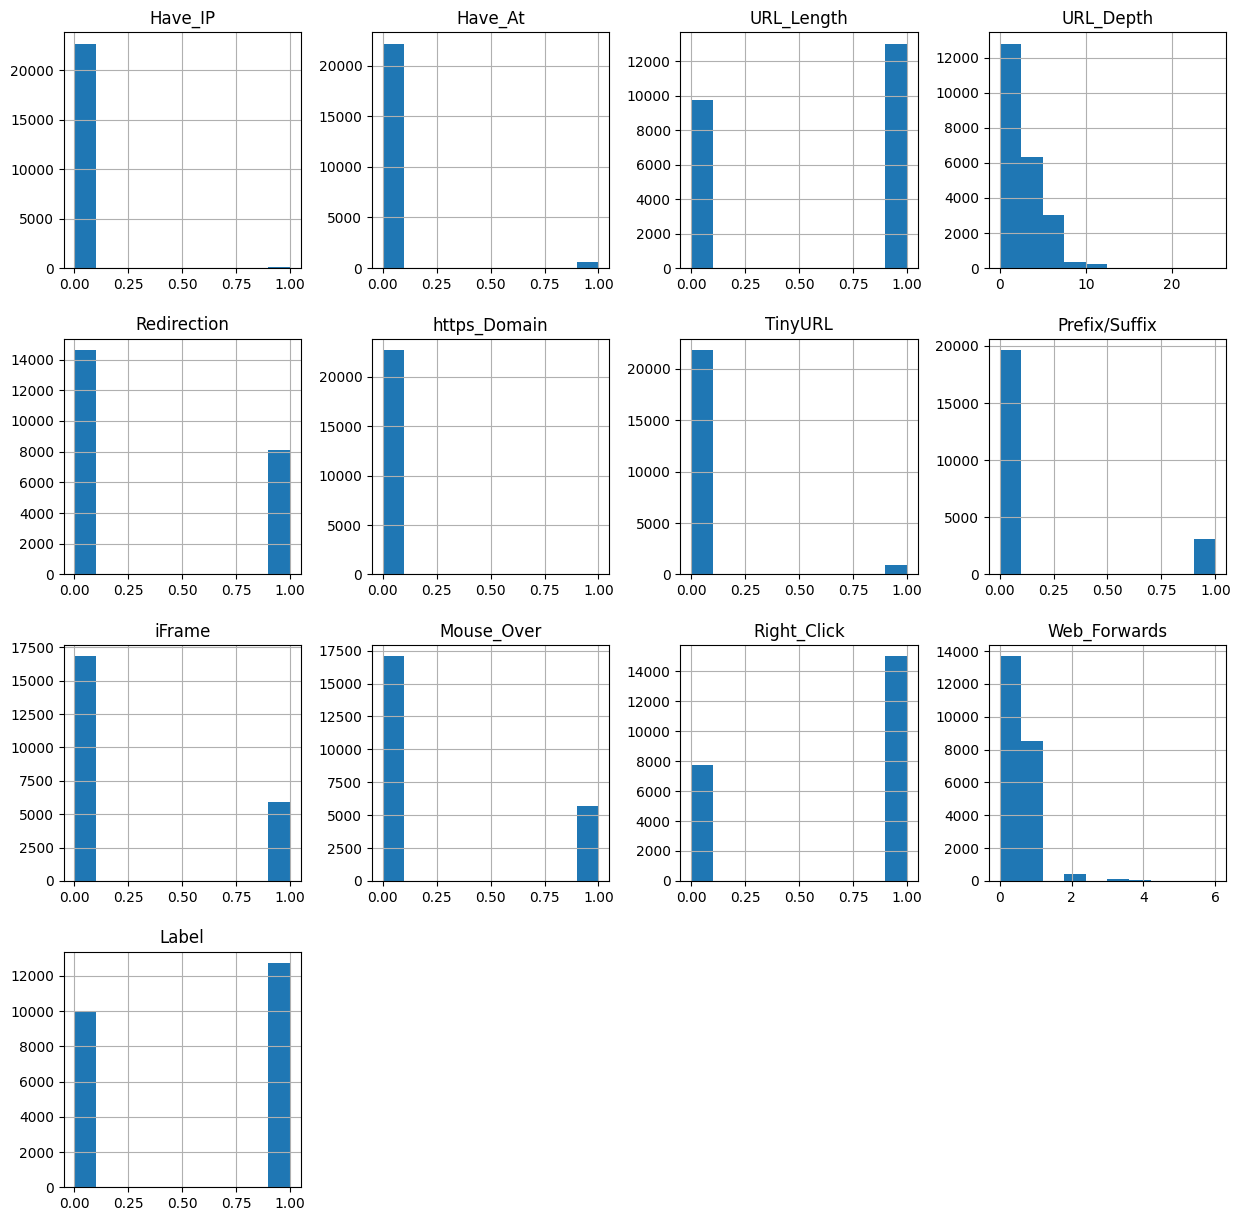

In [13]:
data.hist(figsize=(15, 15))  # Plots histograms for all numerical columns in the 'data' DataFrame with a specified figure size.
plt.show()  # Displays the generated histograms.


In [14]:
y = data['Label']  # Assigns the 'Label' column from the 'data' DataFrame to the variable 'y' as the target variable.
X = data.drop(['Label'], axis=1)  # Drops the 'Label' column from 'data' and assigns the remaining columns to 'X' as features.

X.shape, y.shape  # Displays the dimensions of the feature matrix 'X' and the target vector 'y' as tuples.


((22744, 12), (22744,))

# Splitting the data

In [15]:
from sklearn.model_selection import train_test_split  # Imports the train_test_split function from scikit-learn.

# Splits the feature matrix 'X' and target vector 'y' into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)  
# test_size=0.3 - Allocates 30% of the data for testing and 70% for training.
# random_state=12 - Ensures reproducibility by controlling the randomness of the split.

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  # Prints the shapes of the training and testing datasets.


(15920, 12) (6824, 12) (15920,) (6824,)


In [16]:
# Creating empty lists to store model performance results
Model = []  # This will store the names of the models
Train_Accuracy = []  # This will store the training accuracy (in percentage) for each model
Test_Accuracy = []  # This will store the testing accuracy (in percentage) for each model

# Function to store the accuracy scores of the models
def accuracy_scores(model, a, b):
    # Appending the model name to the 'Model' list
    Model.append(model)
    
    # Appending the training accuracy (converted to percentage) to the 'Train_Accuracy' list
    Train_Accuracy.append((a * 100))
    
    # Appending the test accuracy (converted to a percentage) to the 'Test_Accuracy' list
    Test_Accuracy.append((b * 100))


# Decision Tree Algorithm
Decision trees are used for both classification and regression tasks. They are hierarchical models that use a tree-like structure to represent decisions and their possible consequences, where each internal node represents a decision based on a feature, and each leaf node represents an outcome or a predicted value.

In [17]:
# Importing the DecisionTreeClassifier algorithm and accuracy_score metric from sklearn
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score # For calculating accuracy    

# Creating a Decision Tree model object
tree = DecisionTreeClassifier()  

# Fitting the model on the training data
tree.fit(X_train, y_train)  

# Predicting the target values using the trained model
y_test_tree = tree.predict(X_test)  
y_train_tree = tree.predict(X_train)  

# Calculating accuracy for both training and test data
dta_train_acc = accuracy_score(y_train, y_train_tree) 
dta_test_acc = accuracy_score(y_test, y_test_tree) 

# Printing the results of the Decision Tree model's accuracy
print("DTA: Accuracy on training Data: {:.3f}".format(dta_train_acc))  
print("DTA: Accuracy on test Data: {:.3f}".format(dta_test_acc)) 

DTA: Accuracy on training Data: 0.914
DTA: Accuracy on test Data: 0.914


In [18]:
# Storing the results of the Decision Tree performance
accuracy_scores('Decision Tree', dta_train_acc, dta_test_acc)

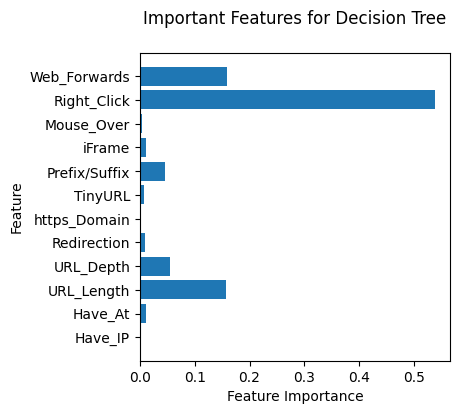

In [19]:
# Plotting the feature importances for the Decision Tree model
plt.figure(figsize=(4,4))  # Creating a figure of size 4x4 inches
plt.title('Important Features for Decision Tree\n')  # Title for the plot

# Getting the number of features (columns) from the training data
n_features = X_train.shape[1]

# Creating a horizontal bar plot for feature importances
plt.barh(range(n_features), tree.feature_importances_, align='center')  # Feature importances on the x-axis, feature index on y-axis

# Setting the y-ticks to be the actual feature names
plt.yticks(np.arange(n_features), X_train.columns)

# Adding labels to the axes
plt.xlabel("Feature Importance")  # Label for the x-axis
plt.ylabel("Feature")  # Label for the y-axis

# Display the plot
plt.show()

**Key Features:**

The most significant features for the Decision Tree model are Web_Forwards and Right_Click, as they have the highest feature importance scores. Additionally, Mouse_Over, iFrame, Prefix/Suffix, and TinyURL contribute moderately to the model's performance.

**Lower Importance Features:**

The features Have_IP, Have_At, and URL_Length exhibit relatively lower importance, indicating they have less impact on the model's predictions.

# Random Forest Algorithm
Random Forest is an ensemble machine learning algorithm that combines the predictions of multiple individual decision trees to improve overall performance and reduce the risk of overfitting. It is particularly effective for both classification and regression tasks

In [20]:
# Importing the necessary library for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  # For calculating accuracy

# Creating a Random Forest model
forest = RandomForestClassifier()

# Fitting the Random Forest model to the training data (X_train and y_train)
forest.fit(X_train, y_train)

# Predicting the target values for the test and training datasets
y_test_forest = forest.predict(X_test)  
y_train_forest = forest.predict(X_train)  

# Calculating accuracy for both the training and test data
rfa_train_acc = accuracy_score(y_train, y_train_forest) 
rfa_test_acc = accuracy_score(y_test, y_test_forest)  

# Printing the accuracy results for Random Forest
print("RFA: Accuracy on training Data: {:.3f}".format(rfa_train_acc)) 
print("RFA : Accuracy on test Data: {:.3f}".format(rfa_test_acc))  

RFA: Accuracy on training Data: 0.914
RFA : Accuracy on test Data: 0.914


In [21]:
# Storing the results of the Random Forest performance 
accuracy_scores('Random Forest Algorithm', rfa_train_acc, rfa_test_acc)

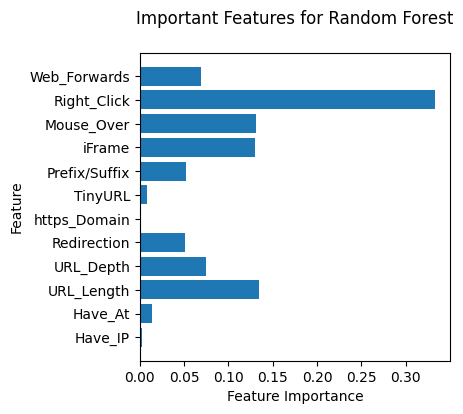

In [22]:
# Plotting the feature importances for the Random Forest model
plt.figure(figsize=(4,4))  # Creating a figure with a 4x4 inches size
plt.title('Important Features for Random Forest\n')  # Title of the plot

# Getting the number of features in the training data (X_train)
n_features = X_train.shape[1]

# Creating a horizontal bar plot for feature importances
plt.barh(range(n_features), forest.feature_importances_, align='center')  # Bar plot with importance values

# Setting the y-ticks to be the actual feature names from the training dataset
plt.yticks(np.arange(n_features), X_train.columns)

# Adding labels to the axes
plt.xlabel("Feature Importance")  # X-axis label indicating the importance
plt.ylabel("Feature")  # Y-axis label indicating the feature names

# Display the plot
plt.show()


# LightGBM
LightGBM (Light Gradient Boosting Machine) is an advanced, high-performance gradient boosting framework that is particularly optimized for speed and efficiency. It is widely used for machine learning tasks, especially for structured/tabular data, and is one of the fastest and most popular gradient boosting algorithms available

In [23]:
# Importing necessary libraries for LightGBM
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score  # For computing accuracy

# Creating a LightGBM classifier model
model = LGBMClassifier()

# Fitting the model to the training data (X_train and y_train)
model.fit(X_train, y_train)

# Predicting the target values for the test and training datasets
y_test_model = model.predict(X_test)  
y_train_model = model.predict(X_train)  

# Calculating accuracy for both training and test data
lgbm_train_acc = accuracy_score(y_train, y_train_model) 
lgbm_test_acc = accuracy_score(y_test, y_test_model)  

# Printing the accuracy results for LightGBM
print("\nLGBM: Accuracy on training Data: {:.3f}".format(lgbm_train_acc)) 
print("LGBM: Accuracy on test Data: {:.3f}".format(lgbm_test_acc))  

[LightGBM] [Info] Number of positive: 8984, number of negative: 6936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 41
[LightGBM] [Info] Number of data points in the train set: 15920, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.564322 -> initscore=0.258720
[LightGBM] [Info] Start training from score 0.258720

LGBM: Accuracy on training Data: 0.914
LGBM: Accuracy on test Data: 0.915


# Storing the results of the LightGBM performance 
accuracy_scores('LightGBM', lgbm_train_acc, lgbm_test_acc)

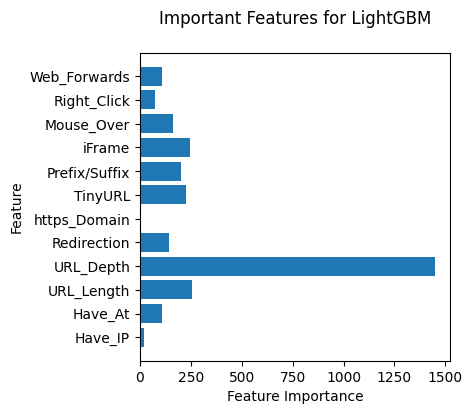

In [24]:
# Plotting the feature importances for the LightGBM model
plt.figure(figsize=(4,4))  
plt.title('Important Features for LightGBM\n') 

# Getting the number of features (columns) from the training data (X_train)
n_features = X_train.shape[1]

# Creating a horizontal bar plot for feature importances
plt.barh(range(n_features), model.feature_importances_, align='center') 

# Setting the y-ticks to correspond to the feature names from the training dataset
plt.yticks(np.arange(n_features), X_train.columns)

# Adding labels to the axes
plt.xlabel("Feature Importance") 
plt.ylabel("Feature") 

# Display the plot
plt.show()


# SVM
Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used primarily for classification tasks, but it can also be used for regression. It works by finding the best boundary (or hyperplane) that separates different classes in the feature space. SVM is particularly effective for high-dimensional datasets and can handle both linear and nonlinear classification problems

In [25]:
# Importing necessary libraries for SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score  

# Creating the SVM model with specified hyperparameters
svc_model = SVC(C=0.1, kernel='linear', gamma=1)  # SVM with linear kernel and specific regularization parameter C and gamma

# Fitting the SVM model to the training data (X_train and y_train)
svc_model.fit(X_train, y_train)

# Predicting the target values for the test and training datasets
y_test_svm = svc_model.predict(X_test)  
y_train_svm = svc_model.predict(X_train) 

# Calculating accuracy for both training and test data
acc_train_svm = accuracy_score(y_train, y_train_svm)  
acc_test_svm = accuracy_score(y_test, y_test_svm)  

# Printing the accuracy results for the SVM model
print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm)) 
print("SVM: Accuracy on test Data: {:.3f}".format(acc_test_svm)) 

SVM: Accuracy on training Data: 0.896
SVM: Accuracy on test Data: 0.898


In [26]:
# Storing the results of the SVM performance 
accuracy_scores('Support Vector Machine', acc_train_svm, acc_test_svm)

# Navie Byes
Naive Bayes is a simple and powerful family of probabilistic machine learning algorithms used for classification tasks. It is based on Bayes' Theorem, which is a principle in probability theory that describes how to update the probability of a hypothesis based on new evidence

In [27]:
# Importing the necessary library for Gaussian Naïve Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score  

# Creating an instance of the Gaussian Naïve Bayes model
gnb = GaussianNB()

# Fitting the model to the training data (X_train and y_train)
gnb.fit(X_train, y_train)

# Making predictions on the test data (X_test) and training data (X_train)
y_test_gnb = gnb.predict(X_test)  
y_train_gnb = gnb.predict(X_train)  

# Calculating accuracy on both the training and test datasets
gnb_train_acc = accuracy_score(y_train, y_train_gnb) 
gnb_test_acc = accuracy_score(y_test, y_test_gnb)  

# Printing the accuracy results for the Gaussian Naïve Bayes model
print('gnb: Accuracy of the Gaussian Naïve Bayes on training data: {:.3f}'.format(gnb_train_acc)) 
print('gnb: Accuracy of the Gaussian Naïve Bayes on test data: {:.3f}'.format(gnb_test_acc)) 

gnb: Accuracy of the Gaussian Naïve Bayes on training data: 0.791
gnb: Accuracy of the Gaussian Naïve Bayes on test data: 0.790


In [28]:
# Storing the results of Navie Bayes performance
accuracy_scores('Gaussian Naïve Bayes', gnb_train_acc, gnb_test_acc)

# XGBoost
XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting that is designed to be highly efficient, flexible, and portable. It is a powerful machine learning algorithm used for both classification and regression tasks, and it often provides state-of-the-art performance for structured/tabular data

In [29]:
# Importing the necessary library for XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score  # For computing accuracy

# Creating an instance of the XGBoost classifier
xgb = XGBClassifier()

# Fitting the model to the training data (X_train and y_train)
xgb.fit(X_train, y_train)

# Making predictions on the test data (X_test) and training data (X_train)
y_test_xgb = xgb.predict(X_test)  
y_train_xgb = xgb.predict(X_train) 

# Calculating accuracy on both the training and test datasets
xgb_train_acc = accuracy_score(y_train, y_train_xgb) 
xgb_test_acc = accuracy_score(y_test, y_test_xgb)  

# Printing the accuracy results for the XGBoost model
print('XGB: Accuracy of XGBoost on training Data: {:.3f}'.format(xgb_train_acc))  
print('XGB: Accuracy of XGBoost on test Data: {:.3f}'.format(xgb_test_acc)) 

XGB: Accuracy of XGBoost on training Data: 0.914
XGB: Accuracy of XGBoost on test Data: 0.915


In [30]:
# Storing the results of XGBoost performance
accuracy_scores('XGBoost', xgb_train_acc, xgb_test_acc)

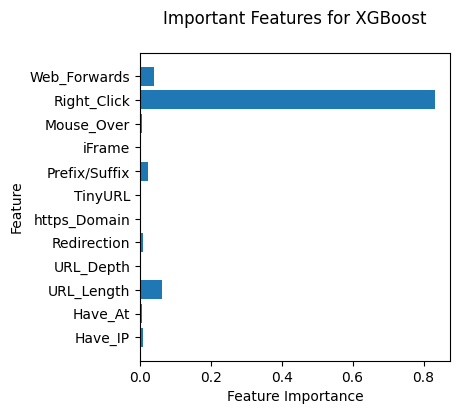

In [31]:
# Plotting the feature importances for the XGBoostmodel
plt.figure(figsize=(4,4))  
plt.title('Important Features for XGBoost\n') 

# Getting the number of features (columns) from the training data (X_train)
n_features = X_train.shape[1]

# Creating a horizontal bar plot for feature importances
plt.barh(range(n_features), xgb.feature_importances_, align='center') 

# Setting the y-ticks to correspond to the feature names from the training dataset
plt.yticks(np.arange(n_features), X_train.columns)

# Adding labels to the axes
plt.xlabel("Feature Importance") 
plt.ylabel("Feature") 

# Display the plot
plt.show()


In [32]:
# Creating a DataFrame from the lists of model names and accuracy scores
results = pd.DataFrame({ 
    'ML Model': Model,            # Model names list
    'Train Accuracy': Train_Accuracy,  # Training accuracy list
    'Test Accuracy': Test_Accuracy   # Test accuracy list
})

# Display the DataFrame to view the model performance
results

# Sorting the DataFrame by 'Train Accuracy' and 'Test Accuracy' in descending order
sorted_results = results.sort_values(by=['Train Accuracy', 'Test Accuracy'], ascending=False)

# Displaying the sorted results
sorted_results


,ML Model,Train Accuracy,Test Accuracy
1,Random Forest Algorithm,91.438442,91.441970
0,Decision Tree,91.438442,91.354045
4,XGBoost,91.394472,91.456624
2,Support Vector Machine,89.579146,89.786049
3,Gaussian Naïve Bayes,79.064070,78.956624


In [33]:
# Display the top model with the best performance
best_model = sorted_results.iloc[0]

# Print the best model details
print(f"The best model is {best_model['ML Model']} with:")
print(f"Train Accuracy: {best_model['Train Accuracy']:.3f}")
print(f"Test Accuracy: {best_model['Test Accuracy']:.3f}")


The best model is Random Forest Algorithm with:
Train Accuracy: 91.438
Test Accuracy: 91.442


# Model Building

In [34]:
# Pickle is a Python library used for serializing and deserializing objects, which means converting Python objects into a byte stream (serialization) and converting the byte stream back into Python objects (deserialization). This process is commonly known as pickling and unpickling
import pickle

# Save the trained Random Forest model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(forest, file)

print("Model saved successfully!")


Model saved successfully!
